# Results

In [63]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Dataset(s)

In [64]:
annotations_path = 'dataset/density_info.csv'
glcm_path = 'dataset/GLCM/GLCM_dataset.csv'
pp_path = 'dataset/pp'
roi_path = 'dataset/roi'

In [65]:
annotations_df = pd.read_csv(annotations_path)
glcm_df = pd.read_csv(glcm_path)

In [66]:
annotations_df['breast density'] = annotations_df['breast density'].replace(3, 2)
annotations_df['breast density'] = annotations_df['breast density'] - 1
annotations_df['breast density'] = annotations_df['breast density'].replace(3, 2)

glcm_df['density'] = glcm_df['density'].replace(3, 2)
glcm_df['density'] = glcm_df['density'] - 1
glcm_df['density'] = glcm_df['density'].replace(3, 2)

In [67]:
annotations_df

,id,file_path,image_path,SeriesDescription,patient_id,image view,breast density
0,0,1.3.6.1.4.1.9590.100.1.2.239949064412092068706...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...,full mammogram images,P_00017,MLO,1
1,1,1.3.6.1.4.1.9590.100.1.2.397840223011442643919...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397840...,full mammogram images,P_00238,CC,1
2,2,1.3.6.1.4.1.9590.100.1.2.204033481911004862841...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.204033...,full mammogram images,P_00699,CC,1
3,3,1.3.6.1.4.1.9590.100.1.2.179488205110519665924...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.179488...,full mammogram images,P_01617,CC,1
4,4,1.3.6.1.4.1.9590.100.1.2.151178406511629586605...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.151178...,full mammogram images,P_00464,MLO,1
...,...,...,...,...,...,...,...
3281,3281,1.3.6.1.4.1.9590.100.1.2.206174998211439771426...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.206174...,full mammogram images,P_00322,MLO,1
3282,3282,1.3.6.1.4.1.9590.100.1.2.211427675111583558805...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.211427...,full mammogram images,P_00019,MLO,2
3283,3283,1.3.6.1.4.1.9590.100.1.2.529156274123405251229...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.529156...,full mammogram images,P_01040,CC,1
3284,3284,1.3.6.1.4.1.9590.100.1.2.744141121110160190397...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.744141...,full mammogram images,P_01462,CC,1


In [68]:
glcm_df

,id,image_path,ASM_0,correlation_0,dissimilarity_0,homogeneity_0,contrast_0,ASM_1,correlation_1,dissimilarity_1,...,homogeneity_2,contrast_2,ASM_3,correlation_3,dissimilarity_3,homogeneity_3,contrast_3,entropy,view,density
0,0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...,0.000060,0.919219,19.823437,0.058807,679.669301,0.000055,0.899927,21.984344,...,0.051649,914.332950,0.000041,0.796236,31.771795,0.036988,1712.944391,7.927204,MLO,1
1,1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397840...,0.000078,0.932134,15.758640,0.068536,427.249847,0.000064,0.894409,19.719170,...,0.064644,503.003140,0.000063,0.891454,20.004721,0.054418,682.401430,7.806423,CC,1
2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.204033...,0.000113,0.958115,11.353278,0.102520,245.717647,0.000078,0.902425,17.306974,...,0.084095,400.147105,0.000085,0.920868,15.573872,0.076014,462.302637,7.767559,CC,1
3,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.179488...,0.000069,0.913868,17.938725,0.067583,583.519332,0.000052,0.838011,24.724598,...,0.062652,704.519531,0.000056,0.859163,22.884829,0.054682,952.034233,7.838326,CC,1
4,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.151178...,0.000077,0.949262,14.990456,0.077173,397.473300,0.000062,0.917030,19.082722,...,0.062199,634.111167,0.000050,0.865504,24.573656,0.047939,1052.476678,7.907911,MLO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,3281,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.206174...,0.000079,0.943011,15.052145,0.075168,407.463450,0.000068,0.918087,17.887443,...,0.069317,539.656740,0.000056,0.876004,22.378577,0.050890,885.111065,7.863990,MLO,1
3282,3282,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.211427...,0.000083,0.956561,13.679136,0.084714,342.405300,0.000065,0.926957,17.968643,...,0.067305,507.122044,0.000056,0.894525,21.545790,0.053552,830.344129,7.912320,MLO,2
3283,3283,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.529156...,0.000083,0.960226,13.401118,0.083634,315.865089,0.000065,0.931331,17.739746,...,0.082715,316.419868,0.000067,0.936280,17.020900,0.066712,504.990204,7.918697,CC,1
3284,3284,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.744141...,0.000056,0.888072,21.800322,0.051935,808.409482,0.000046,0.814763,28.103468,...,0.049032,939.963894,0.000046,0.821427,27.653856,0.041327,1288.598847,7.861434,CC,1


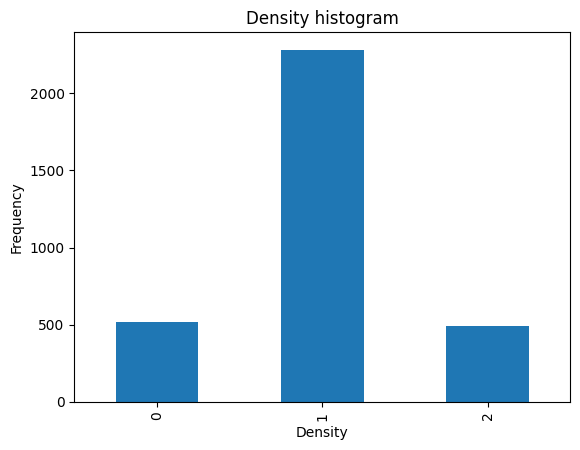

classes: [1 0 2]
class A (0) count: 516
class B + C (1) count: 2281
class D (2) count: 489


In [69]:
annotations_df['breast density'].value_counts().sort_index().plot(kind='bar')

plt.title('Density histogram')
plt.xlabel('Density')
plt.ylabel('Frequency')

plt.show()

print(f'classes: {annotations_df["breast density"].unique()}')
print(f'class A (0) count: {len(annotations_df[annotations_df["breast density"] == 0])}')
print(f'class B + C (1) count: {len(annotations_df[annotations_df["breast density"] == 1])}')
print(f'class D (2) count: {len(annotations_df[annotations_df["breast density"] == 2])}')

### Undersampling

In [70]:
n = 1700
annotations_df = annotations_df.drop(annotations_df[annotations_df['breast density'] == 1].sample(n = n, random_state=1).index)
glcm_df = glcm_df.drop(glcm_df[glcm_df['density'] == 1].sample(n = n, random_state=1).index)

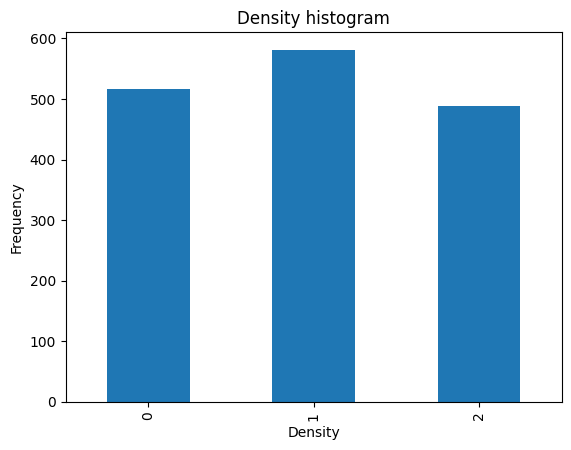

classes: [1 0 2]
class A (0) count: 516
class B + C (1) count: 581
class D (2) count: 489


In [71]:
annotations_df['breast density'].value_counts().sort_index().plot(kind='bar')

plt.title('Density histogram')
plt.xlabel('Density')
plt.ylabel('Frequency')

plt.show()

print(f'classes: {annotations_df["breast density"].unique()}')
print(f'class A (0) count: {len(annotations_df[annotations_df["breast density"] == 0])}')
print(f'class B + C (1) count: {len(annotations_df[annotations_df["breast density"] == 1])}')
print(f'class D (2) count: {len(annotations_df[annotations_df["breast density"] == 2])}')

## KNN (K = , all features)